<a href="https://colab.research.google.com/github/Nymisha-ruby/Experiments/blob/main/Sol1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
tr_data = pd.read_csv('/content/drive/MyDrive/Premium Payment Prediction/train_premium.csv') 
ts_data = pd.read_csv('/content/drive/MyDrive/Premium Payment Prediction/test_premium.csv')

In [3]:
tr_data.head(10)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1
5,59951,0.540,17527,282080,2.0,0.0,0.0,99.18,9,B,Rural,1
6,54031,1.000,24829,118400,0.0,0.0,0.0,99.05,11,B,Urban,1
7,94290,1.000,21911,180240,1.0,6.0,4.0,99.33,3,A,Urban,0
8,93730,0.621,9868,92520,0.0,0.0,0.0,99.58,4,A,Urban,1
9,84844,0.908,23008,107180,2.0,0.0,0.0,98.91,11,A,Rural,0


In [16]:
ts_data.head(10)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural
5,64797,0.112,16065,245130,0.0,0.0,0.0,98.88,7,B,Rural
6,67412,0.325,17167,388050,6.0,0.0,0.0,99.00,27,C,Urban
7,44241,0.362,20085,99880,3.0,0.0,0.0,98.40,14,A,Urban
8,5069,0.115,23008,360040,0.0,0.0,0.0,99.88,6,D,Rural
9,16615,0.021,21906,510040,0.0,0.0,0.0,99.89,11,B,Urban


In [17]:
print(tr_data.shape)
print('\n')
print(ts_data.shape)

(79853, 12)


(34224, 11)


In [34]:
tr_data.describe()

,id,perc_premium_paid_by_cash_credit,age,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,51.607404,2.088472e+05,0.248369,0.078093,0.059935,99.067291,10.863887,0.937410
std,32928.970160,0.334915,14.270484,4.965826e+05,0.691102,0.436251,0.311840,0.725892,5.170687,0.242226
min,2.000000,0.000000,21.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,41.000000,1.080100e+05,0.000000,0.000000,0.000000,98.830000,7.000000,1.000000
50%,57262.000000,0.167000,51.000000,1.665600e+05,0.000000,0.000000,0.000000,99.180000,10.000000,1.000000
75%,85632.000000,0.538000,62.000000,2.520900e+05,0.000000,0.000000,0.000000,99.520000,14.000000,1.000000
max,114076.000000,1.000000,103.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


In [18]:
ts_data.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid
count,34224.000000,34224.000000,34224.000000,3.422400e+04,34193.000000,34193.000000,34193.000000,32901.000000,34224.000000
mean,56739.956376,0.314457,18824.215346,2.028201e+05,0.238733,0.080718,0.058111,99.061898,10.890428
std,32935.402647,0.334059,5246.525604,2.702536e+05,0.686162,0.454634,0.307046,0.742942,5.216867
min,1.000000,0.000000,7671.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000
25%,28254.750000,0.034000,14972.000000,1.063975e+05,0.000000,0.000000,0.000000,98.800000,7.000000
50%,56488.000000,0.169000,18623.000000,1.650700e+05,0.000000,0.000000,0.000000,99.210000,10.000000
75%,85386.250000,0.540000,22636.000000,2.500200e+05,0.000000,0.000000,0.000000,99.530000,14.000000
max,114077.000000,1.000000,35785.000000,2.191455e+07,12.000000,10.000000,7.000000,99.890000,59.000000


In [6]:
tr_data.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [19]:
ts_data.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [3]:
#Converting Age in Days to Age in Years
tr_data['age_in_days']=tr_data['age_in_days']//365
ts_data['age_in_days']=ts_data['age_in_days']//365

In [4]:
tr_data = tr_data.rename({'age_in_days':'age'},axis='columns')
ts_data = ts_data.rename({'age_in_days':'age'},axis='columns')

In [22]:
tr_data.head()

,id,perc_premium_paid_by_cash_credit,age,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,33,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,59,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,48,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,42,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,86,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [6]:
ts_data.head()

,id,perc_premium_paid_by_cash_credit,age,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,75,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,65,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,47,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,44,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,29,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [9]:
tr_data.nunique()

id                                  79853
perc_premium_paid_by_cash_credit     1001
age                                    82
Income                              24165
Count_3-6_months_late                  14
Count_6-12_months_late                 17
Count_more_than_12_months_late         10
application_underwriting_score        672
no_of_premiums_paid                    57
sourcing_channel                        5
residence_area_type                     2
target                                  2
dtype: int64

#Handling Missing values

In [5]:
tr_data['Count_3-6_months_late'].fillna(tr_data['Count_3-6_months_late'].mode()[0],inplace=True)
tr_data['Count_6-12_months_late'].fillna(tr_data['Count_6-12_months_late'].mode()[0],inplace=True)
tr_data['Count_more_than_12_months_late'].fillna(tr_data['Count_more_than_12_months_late'].mode()[0],inplace=True)

In [6]:
print(tr_data['Count_3-6_months_late'].unique())
print('\n')
print(tr_data['Count_6-12_months_late'].unique())
print('\n')
print(tr_data['Count_more_than_12_months_late'].unique())

[ 0.  2.  1.  3.  4.  7.  5.  6.  8. 13. 12.  9. 11. 10.]


[ 0.  3.  6.  2. 10.  1.  4.  7.  5. 17.  9. 15.  8. 11. 14. 13. 12.]


[ 0.  1.  4.  2.  3.  7.  5. 11.  6.  8.]


In [14]:
#missing_col = ['Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late']
#for i in missing_col:
  #tr_data.loc[tr_data.loc[:,i].isnull(),i]=tr_data.loc[:,i].mode()

In [7]:
mean_value=tr_data['application_underwriting_score'].mean()
tr_data['application_underwriting_score'].fillna(value=mean_value, inplace=True)

In [7]:
tr_data.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age                                 0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

In [8]:
ts_data['Count_3-6_months_late'].fillna(ts_data['Count_3-6_months_late'].mode()[0],inplace=True)
ts_data['Count_6-12_months_late'].fillna(ts_data['Count_6-12_months_late'].mode()[0],inplace=True)
ts_data['Count_more_than_12_months_late'].fillna(ts_data['Count_more_than_12_months_late'].mode()[0],inplace=True)

In [9]:
mean_value=ts_data['application_underwriting_score'].mean()
ts_data['application_underwriting_score'].fillna(value=mean_value, inplace=True)

In [12]:
ts_data.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age                                 0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

#Visualization

In [15]:
tr_data['target'].value_counts()

1    74855
0     4998
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x7f12d19a3110>,
 [Text(-1.078803086747592, 0.21490439740467726, ''),
  Text(1.0788030917777922, -0.21490437215346894, '')])

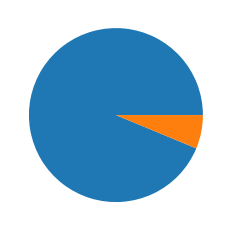

In [12]:
plt.pie(tr_data['target'].value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


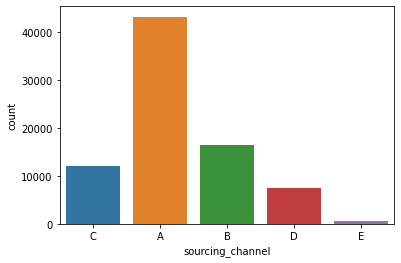

In [32]:
sns.countplot(tr_data['sourcing_channel'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


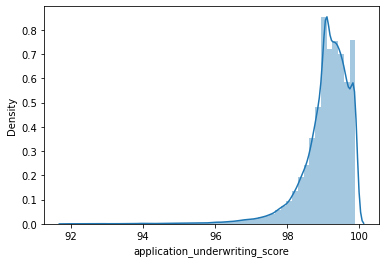

In [14]:
sns.distplot(tr_data['application_underwriting_score'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


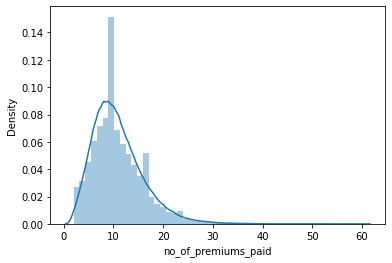

In [35]:
sns.distplot(tr_data['no_of_premiums_paid'])

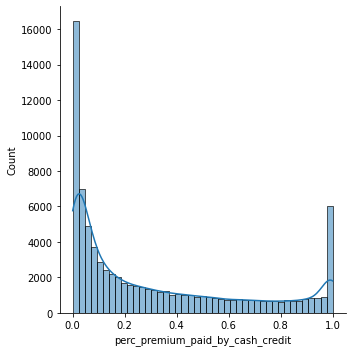

In [19]:
sns.displot(tr_data, x='perc_premium_paid_by_cash_credit', kde=True)

In [30]:
pd.crosstab(tr_data['Count_3-6_months_late'][tr_data['Count_3-6_months_late']>0],tr_data['target'])

target,0,1
Count_3-6_months_late,,
1.0,1153,7673
2.0,592,1927
3.0,288,666
4.0,158,216
5.0,67,101
6.0,31,37
7.0,10,13
8.0,6,9
9.0,2,2


In [31]:
pd.crosstab(tr_data['Count_6-12_months_late'][tr_data['Count_6-12_months_late']>0],tr_data['target'])

target,0,1
Count_6-12_months_late,,
1.0,828,1852
2.0,334,359
3.0,185,132
4.0,85,45
5.0,30,16
6.0,13,13
7.0,7,4
8.0,3,2
9.0,2,2


In [32]:
pd.crosstab(tr_data['Count_more_than_12_months_late'][tr_data['Count_more_than_12_months_late']>0],tr_data['target'])

target,0,1
Count_more_than_12_months_late,,
1.0,835,2161
2.0,228,270
3.0,85,66
4.0,25,23
5.0,7,6
6.0,4,2
7.0,2,1
8.0,1,1
11.0,1,0


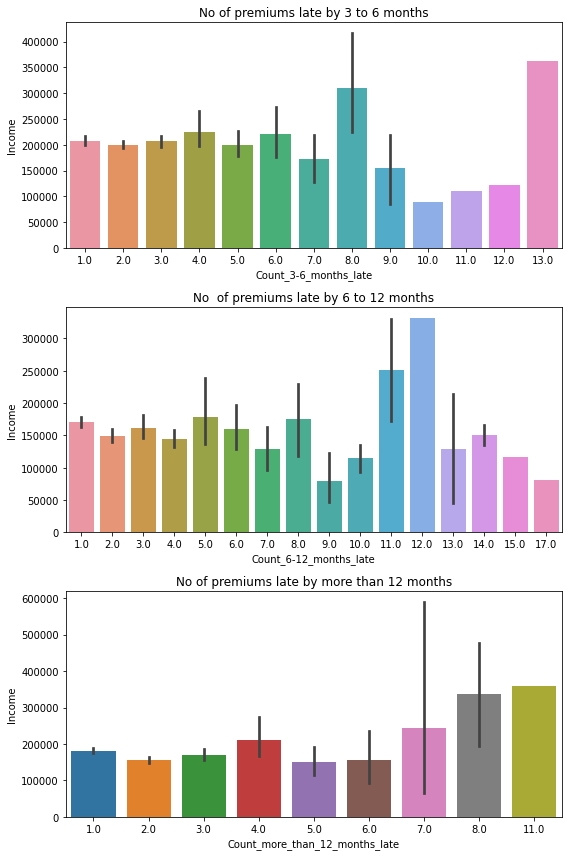

In [29]:
fig = plt.figure(figsize=(8,12))

ax = fig.add_subplot(311)
sns.barplot(x = tr_data['Count_3-6_months_late'][tr_data['Count_3-6_months_late']>0], y = tr_data['Income'])
plt.title('No of premiums late by 3 to 6 months')


ax = fig.add_subplot(312)
sns.barplot(x = tr_data['Count_6-12_months_late'][tr_data['Count_6-12_months_late']>0],y = tr_data['Income'])
plt.title('No  of premiums late by 6 to 12 months')


ax = fig.add_subplot(313)
sns.barplot(x = tr_data['Count_more_than_12_months_late'][tr_data['Count_more_than_12_months_late']>0],y = tr_data['Income'])
plt.title('No of premiums late by more than 12 months')


plt.tight_layout()

plt.show()

In [30]:
tr_data.corr()

,perc_premium_paid_by_cash_credit,age,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
perc_premium_paid_by_cash_credit,1.000000,-0.259133,-0.031868,0.213011,0.213953,0.167213,-0.138006,-0.152837,0.081999,-0.001562,-0.240980
age,-0.259133,1.000000,0.029308,-0.057873,-0.072439,-0.059116,0.047949,0.176544,-0.217891,0.000683,0.095100
Income,-0.031868,0.029308,1.000000,-0.001296,-0.017292,-0.012341,0.062637,0.079078,0.059770,0.003392,0.016541
Count_3-6_months_late,0.213011,-0.057873,-0.001296,1.000000,0.204286,0.296139,-0.082306,0.076435,0.058741,0.001513,-0.246469
Count_6-12_months_late,0.213953,-0.072439,-0.017292,0.204286,1.000000,0.266337,0.004581,-0.092593,0.027668,-0.000809,-0.284034
Count_more_than_12_months_late,0.167213,-0.059116,-0.012341,0.296139,0.266337,1.000000,-0.031527,-0.021409,0.029243,-0.001219,-0.238482
application_underwriting_score,-0.138006,0.047949,0.062637,-0.082306,0.004581,-0.031527,1.000000,-0.262585,-0.047667,0.004916,0.067333
no_of_premiums_paid,-0.152837,0.176544,0.079078,0.076435,-0.092593,-0.021409,-0.262585,1.000000,0.040874,0.003447,0.022664
sourcing_channel,0.081999,-0.217891,0.059770,0.058741,0.027668,0.029243,-0.047667,0.040874,1.000000,-0.002067,-0.041557
residence_area_type,-0.001562,0.000683,0.003392,0.001513,-0.000809,-0.001219,0.004916,0.003447,-0.002067,1.000000,0.001667


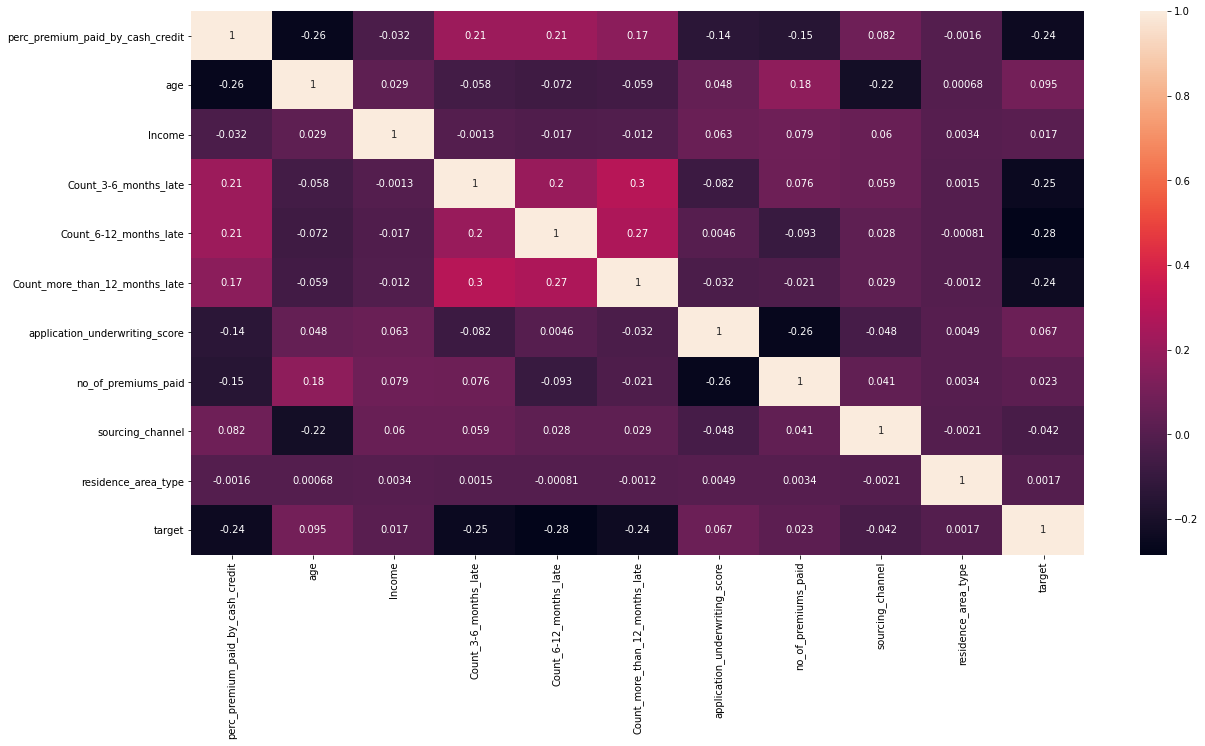

In [31]:
corr = tr_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [10]:
tr_data = pd.get_dummies(tr_data)

In [11]:
ts_data = pd.get_dummies(ts_data)

In [12]:
x = tr_data.drop('target',axis=1)

In [13]:
y = tr_data['target']

In [14]:
ids = ts_data['id']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [17]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((55897, 16), (23956, 16), (55897,), (23956,))

LinearRegression 

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

lr_model = LinearRegression()

lr_model.fit(xtrain,ytrain)
pred = lr_model.predict(xtest)

In [19]:
lr_model.score(xtest,ytest)

0.1683307992057792

In [20]:
lr_model.score(xtrain,ytrain)

0.1500183306346532

In [21]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(max_depth=25, random_state=15, class_weight={1:1,0:19.9769}, min_weight_fraction_leaf=0.40, max_leaf_nodes=50, min_impurity_decrease= 0.009)

clf.fit(x,y)
clf.score(x,y)

0.7039434961742201

In [22]:
clf.predict(ts_data)

array([1, 1, 0, ..., 1, 0, 1])

In [23]:
prediction=clf.predict(ts_data)

In [24]:
sub = pd.DataFrame()

In [25]:
sub['id'] = ids

In [26]:
sub['target'] = prediction

In [27]:
prediction

array([1, 1, 0, ..., 1, 0, 1])

In [29]:
sub.to_csv('submission.csv', header=True, index=False)